In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [13]:
colnames=['H', 'W', 'P','heat'] 
df =pd.read_csv('/content/hiwipi6.csv', names=colnames,header=None)
df.head()

,H,W,P,heat
0,0.068,0.456,0.76,20.498017
1,0.070,0.456,0.76,21.034243
2,0.072,0.456,0.76,21.208462
3,0.074,0.456,0.76,21.083614
4,0.054,0.494,0.76,20.815643


In [3]:
#df = df.drop(df[df.heat < 13].index)
#df=df.reset_index(drop=True)

In [4]:
#df["H"]
#df.iloc[2:5]

,H,W,P,heat
2,0.086,0.704,0.88,20.936833
3,0.088,0.704,0.88,21.162386
4,0.090,0.704,0.88,21.203080


In [ ]:
#UNIT conversion
div = 45
df['H']=0.02 + (df["H"]/div)*0.08 
df["P"]=0.4+(df["P"]/div)*1.2

#df["W"]=0.05 + (df["W"]/45)*df['P']
df['W'] = np.multiply(df['W'],df['P'])
df['W']=(df['W']/div)
#df['W'] = df['W'] + 0.05
'''
for i in range(0,df['H'].shape[0]):
  df["W"][i]=0.05 + (df["W"][i]/45)*df['P'][i]
'''

#all in Um

'\nfor i in range(0,df[\'H\'].shape[0]):\n  df["W"][i]=0.05 + (df["W"][i]/45)*df[\'P\'][i]\n'

In [3]:
df

,H,W,P,heat
0,0.068,0.456,0.76,20.498017
1,0.070,0.456,0.76,21.034243
2,0.072,0.456,0.76,21.208462
3,0.074,0.456,0.76,21.083614
4,0.054,0.494,0.76,20.815643
...,...,...,...,...
152,0.060,0.700,1.00,12.106136
153,0.062,0.700,1.00,12.805435
154,0.064,0.700,1.00,12.848855
155,0.066,0.700,1.00,12.804959


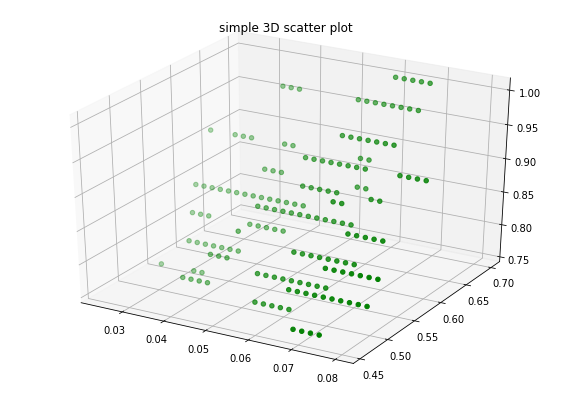

In [4]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(df['H'], df['W'], df['P'], color = "green")
plt.title("simple 3D scatter plot")
# show plot
plt.show()

DATA SCALING - MIN MAX

In [ ]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
df2 = scaler.fit_transform(df)

x = scaler.fit_transform(df["H"].values.reshape(-1, 1))
y = scaler.fit_transform(df["W"].values.reshape(-1, 1))
z = scaler.fit_transform(df["P"].values.reshape(-1, 1))

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot

ax.scatter3D(x, y, z, color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

ELBOW METHOD to determine number of clusters

In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans


distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df2)
    distortions.append(kmeanModel.inertia_)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


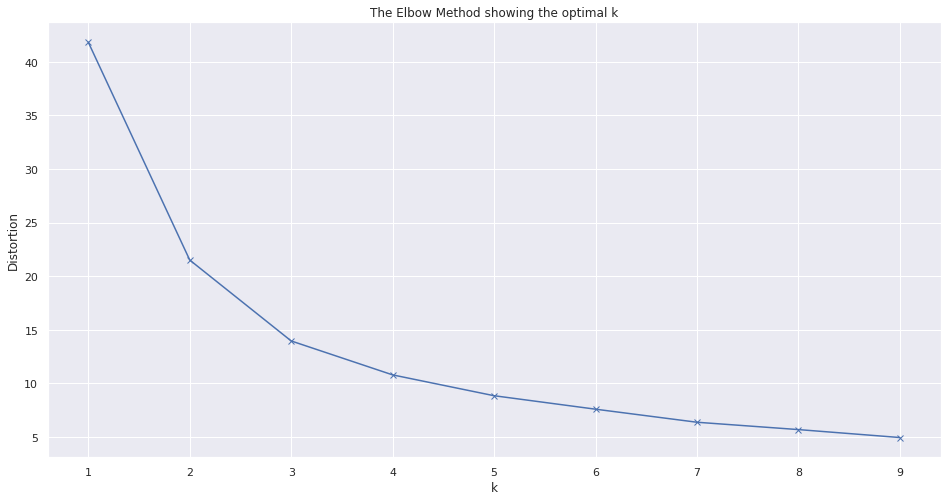

In [7]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

K-means CLUSTERING MODEL

In [8]:
clust = 2
kmeans = KMeans(clust)
kmeans.fit(df2)

KMeans(n_clusters=3)

In [9]:
identified_clusters = kmeans.fit_predict(df2)

In [ ]:
#skip
df3 = pd.DataFrame(df2, columns = colnames)
df3

,H,W,P,heat
0,0.361111,0.000000,0.000000,0.525810
1,0.388889,0.000000,0.000000,0.537498
2,0.416667,0.000000,0.000000,0.545506
3,0.444444,0.000000,0.000000,0.549242
4,0.472222,0.000000,0.000000,0.547961
...,...,...,...,...
208,0.055556,0.716596,0.666667,0.284689
209,0.000000,0.811064,0.777778,0.421768
210,0.027778,0.811064,0.777778,0.173704
211,0.000000,0.905532,0.888889,0.282010


In [10]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 
data_with_clusters.head()

,H,W,P,heat,Clusters
0,0.068,0.456,0.76,20.498017,0
1,0.070,0.456,0.76,21.034243,0
2,0.072,0.456,0.76,21.208462,0
3,0.074,0.456,0.76,21.083614,0
4,0.054,0.494,0.76,20.815643,0


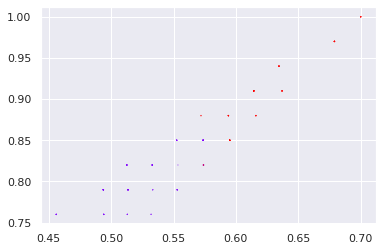

In [11]:
plt.scatter(data_with_clusters['W'],data_with_clusters['P'],data_with_clusters['H'],c=data_with_clusters['Clusters'],cmap='rainbow')

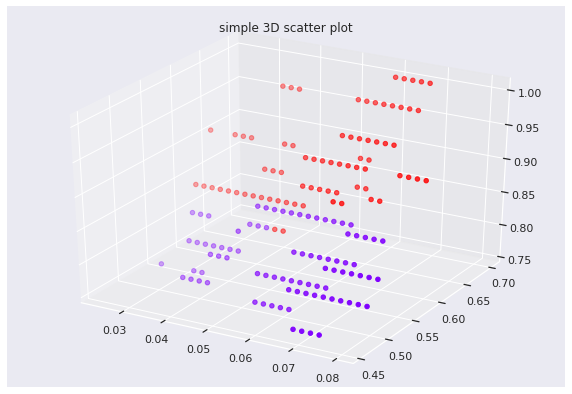

In [12]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
#ax.scatter3D(x,z,y, c = data_with_clusters['Clusters'],cmap='rainbow' )
ax.scatter3D(data_with_clusters['H'],data_with_clusters['W'],data_with_clusters['P'], c = data_with_clusters['Clusters'],cmap='rainbow' )
plt.title("simple 3D scatter plot")
# show plot
plt.show()


In [14]:
n = clust #no. of clusters
t = 3 # no. of variables

starting = np.zeros((n,t)) # start[cluster no][h/w/p]
#starting = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
ending = np.zeros((n,t))

starting.fill(1000)

In [15]:
starting[data_with_clusters['Clusters'][2],0]
#data_with_clusters['H'][4]
starting.fill(1000)

In [16]:
data_with_clusters['Clusters']

0      0
1      0
2      0
3      0
4      0
      ..
458    1
459    1
460    1
461    1
462    1
Name: Clusters, Length: 463, dtype: int32

In [17]:
for j in range(0,data_with_clusters['Clusters'].shape[0]-1): #h w p clust
  starting[data_with_clusters['Clusters'][j]-1,0]=min(starting[data_with_clusters['Clusters'][j]-1,0],data_with_clusters['H'][j])
  starting[data_with_clusters['Clusters'][j]-1,1]=min(starting[data_with_clusters['Clusters'][j]-1,1],data_with_clusters['W'][j])
  starting[data_with_clusters['Clusters'][j]-1,2]=min(starting[data_with_clusters['Clusters'][j]-1,2],data_with_clusters['P'][j])
  ending[data_with_clusters['Clusters'][j]-1,0]=max(ending[data_with_clusters['Clusters'][j]-1,0],data_with_clusters['H'][j])
  ending[data_with_clusters['Clusters'][j]-1,1]=max(ending[data_with_clusters['Clusters'][j]-1,1],data_with_clusters['W'][j])
  ending[data_with_clusters['Clusters'][j]-1,2]=max(ending[data_with_clusters['Clusters'][j]-1,2],data_with_clusters['P'][j])

In [18]:
starting

array([[0.022, 0.95 , 1.   ],
       [0.026, 0.704, 0.88 ]])

In [19]:
ending

array([[0.086 , 1.235 , 1.3   ],
       [0.1   , 0.9805, 1.09  ]])

In [20]:
final=[]#
final.append(['H','W','P'])
for i in range(0,ending.shape[0]):
  temp = []
  temp2= []
  temp2 = np.append(temp2, starting[i][0])
  temp2 = np.append(temp2, ending[i][0])
  temp.append(temp2)
  temp2= []
  temp2 = np.append(temp2, starting[i][1])
  temp2 = np.append(temp2, ending[i][1])
  temp.append(temp2)
  temp2= []
  temp2 = np.append(temp2, starting[i][2])
  temp2 = np.append(temp2, ending[i][2])
  temp.append(temp2)
  temp2= []
  final.append(temp)
final

[['H', 'W', 'P'],
 [array([0.022, 0.086]), array([0.95 , 1.235]), array([1. , 1.3])],
 [array([0.026, 0.1  ]), array([0.704 , 0.9805]), array([0.88, 1.09])]]

In [ ]:
len(final)
final[1][0][0]

0.022

In [21]:
for c in range(1,len(final)):# C CLUSTER
  print("clust",c)
  print("range H is from",final[c][0][0],"to",final[c][0][1],"Um")
  print("range W is from",final[c][1][0],"to",final[c][1][1],"Um")
  print("range P is from",final[c][2][0],"to",final[c][2][1],"Um")
  

clust 1
range H is from 0.022 to 0.086 Um
range W is from 0.95 to 1.235 Um
range P is from 1.0 to 1.3 Um
clust 2
range H is from 0.026 to 0.1 Um
range W is from 0.704 to 0.9805 Um
range P is from 0.88 to 1.09 Um


above output shows ranges of good design

HEAT MAP

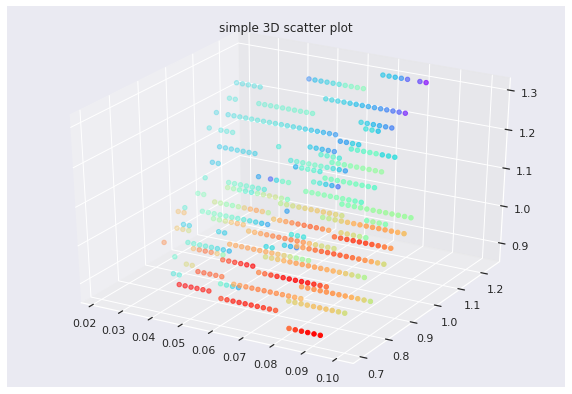

In [22]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
#ax.scatter3D(x,z,y, c = data_with_clusters['Clusters'],cmap='rainbow' )
ax.scatter3D(data_with_clusters['H'],data_with_clusters['W'],data_with_clusters['P'], c = data_with_clusters['heat'],cmap='rainbow' )
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()